<a href="https://colab.research.google.com/github/satyambhatt5/Natural-language-Processing-/blob/main/NLP_ALL_DETAILS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#using this library for the read the document of the file 
import nltk
import numpy as np


#using this library for the for saving the data in the corpus 

from nltk.corpus import stopwords
nltk.data.path
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))


In [ ]:
#tokenize the function   

def extract_words(sentence):
  cleaned_text= [w.lower() for w in nltk.word_tokenize(sentence) if w not in stop_words]

  return cleaned_text

In [ ]:
#this funtion will be make vacab and store the data

def vocab(corpus):

  #now create the empty list 
  vocabulary =[]
  for doc in corpus:
    word=extract_words(doc)
    vocabulary.extend(word)
    vocabulary=sorted(list(set(vocabulary)))
  return vocabulary



In [ ]:
#now create the bow function

def bow(sentence,vocabulary):
  #extract the word in to the sentence 
  words=extract_words(sentence)
  
  #create the lenth of the vacabulary 

  bag=np.zeros(len(vocabulary))
  #create the word and enumerate the vocabulary 

  for word in words:
    for i,vocab in enumerate (vocabulary):
      if vocab ==word:
        bag[i] +=1
  return np.array(bag)



In [ ]:
#add the file document 

corpus=["Satyam like to watch movies",
        "Dinesh like to play football",
        "Satyam like to watch the football but he does not like to play",
        "both Satyam and Dinesh like to play video games"]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
vocabulary=vocab(corpus)

In [ ]:
print(vocabulary)

['dinesh', 'football', 'games', 'like', 'movies', 'play', 'satyam', 'video', 'watch']


In [ ]:
bow("Satyam like to watch the football but he does not like to play",vocabulary)

array([0., 1., 0., 2., 0., 1., 1., 0., 1.])

In [ ]:
#Using the Machine Learning Technique 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
corpus=["Satyam like to watch movies",
        "Dinesh like to play football",
        "Satyam like to watch the football but he does not like to play",
        "both Satyam and Dinesh like to play video games"]

In [ ]:
count_vectorizer=CountVectorizer(stop_words=stop_words)
bagofwords=count_vectorizer.fit_transform(corpus)
bagofwords.toarray()

array([[0, 0, 0, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 0]])

In [ ]:
feature_names=count_vectorizer.get_feature_names()

In [ ]:
print(feature_names)

['dinesh', 'football', 'games', 'like', 'movies', 'play', 'satyam', 'video', 'watch']


In [ ]:
#now we are present the feature name 
db=pd.DataFrame(bagofwords.toarray(),columns=feature_names)
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   dinesh    4 non-null      int64
 1   football  4 non-null      int64
 2   games     4 non-null      int64
 3   like      4 non-null      int64
 4   movies    4 non-null      int64
 5   play      4 non-null      int64
 6   satyam    4 non-null      int64
 7   video     4 non-null      int64
 8   watch     4 non-null      int64
dtypes: int64(9)
memory usage: 416.0 bytes


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


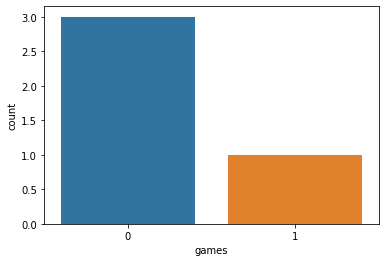

In [ ]:
sns.countplot(db.games)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


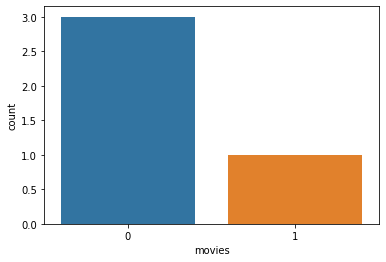